# <font color = 'red'> 2 物理学中的数值计算 </font>
    
<img src="Images/2-1.png" alt='Drawing' style='width:500px' align = 'center'>

---
## <font color = 'blue'> 2.1 插值 </font>

### <font color = 'black'> 2.1.1 拉格朗日插值
    
<img src="Images/2-2.png" alt='Drawing' style='width:500px' align = 'center'>

---

<img src="Images/2-3.png" alt='Drawing' style='width:500px' align = 'center'>

---
    
<img src="Images/2-4.png" alt='Drawing' style='width:500px' align = 'center'>

---

<img src="Images/2-5.png" alt='Drawing' style='width:500px' align = 'center'>

---

<img src="Images/2-6.png" alt='Drawing' style='width:500px' align = 'center'>

---
    
<img src="Images/2-7.png" alt='Drawing' style='width:500px' align = 'center'>
    
拉格朗日插值的原理是很朴素的

- 要求插值函数通过每一个数据点
- (n-1) 次函数只有 n 个待定系数，因此在不考虑实验噪声的情况下，我们完全可以通过 n 组数据构造 (n-1) 次多项式函数
- 构造 n 个基函数，每个基函数都是 (n-1) 次多项式函数，且满足 $A_i(x_j) = \delta_{ij}$，那么如此构造的多项式函数势必满足我们的要求，因此形式也是极为简单的。

---

<img src="Images/2-8.png" alt='Drawing' style='width:500px' align = 'center'>

### 2.1.2 案例

<img src="Images/2-9.png" alt='Drawing' style='width:500px' align = 'center'>


energy of particle: 5553.278 KeV 


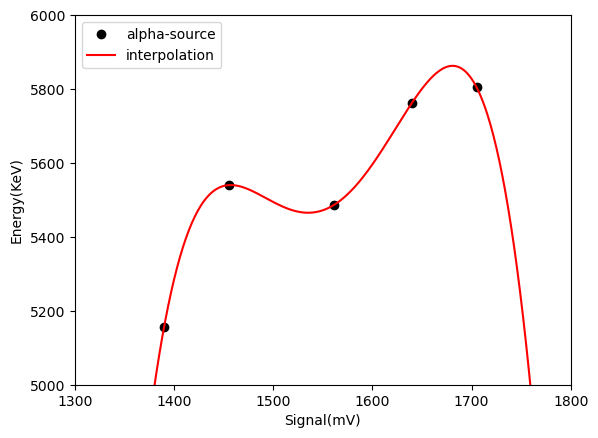

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------ 写入实验数据 ----------------------------
f = open('Data/粒子物理能量幅度数据.dat','w')  # 打开文件夹准备写入实验数据
E = np.array([5156, 5540, 5486, 5763, 5805])
S = np.array([1390, 1455, 1561, 1640, 1705])

for ii in range(5):  # 写入试验数据
    f.write('%d\t%d\n' %(E[ii], S[ii]))
    
# ---------------------- 从文件中读入实验数据 ----------------------
energy_alpha_source = np.zeros(5)  # 初始化
signal_alpha_source = np.zeros(5)

with open('Data/粒子物理能量幅度数据.dat','r') as fin:  # 读入数据
    ii = 0
    for lines in fin:
        word = lines.split()
        energy_alpha_source[ii] = float(word[0])
        signal_alpha_source[ii] = float(word[1])
        ii = ii+1

# ----------------------- 拉格朗日插值函数 -------------------------
# 原始数据有五组数据，所以此处进行四次差值
def lagr_poly(x0, y0, n, x):  # n 是实验数据组数
    y = 0;
    for ii in range(n):
        p = 1
        for jj in range(n):
            if (ii != jj):
                p = p*(x-x0[jj])/(x0[ii]-x0[jj])
        y = y + p*y0[ii]
    return y

# ----------------------- 信号插值 -----------------------------------
signal = np.arange(1300, 1800, 1)
energy = []
for x in signal:
    xenergy = lagr_poly(signal_alpha_source, energy_alpha_source, 5, x)
    energy.append(xenergy)

print('energy of particle: %8.3f KeV ' %lagr_poly(signal_alpha_source, \
                                                 energy_alpha_source, 5, 1588))

# ------------------------ 作图 -----------------------------------------
plt.plot(signal_alpha_source, energy_alpha_source, 'ko', label='alpha-source')
plt.plot(signal, energy, 'r-', label='interpolation')
plt.xlabel('Signal(mV)')
plt.ylabel('Energy(KeV)')
plt.xlim(1300, 1800)
plt.ylim(5000, 6000)
plt.legend(loc='best')
plt.show()

### <font color = 'black'> 2.1.3 样条插值 </font>
   
前面的拉格朗日插值极容易出现高次过拟合，实际情况中我们用不到那么高次的函数来拟合实验数据。此处介绍样条插值，或者三次插值法，其基本逻辑是：每两个相邻点之间分段进行三次插值，但每段之间又是光滑的。

<img src="Images/2-10.png" alt='Drawing' style='width:500px' align = 'center'>
    
上式中，A、B、C和D全是已知的，唯有每个端点处的二阶导数$y_j^{\prime\prime}$未知，我们的目标即是找出这些二阶导数：

<img src="Images/2-11.png" alt='Drawing' style='width:500px' align = 'center'>


(5000.0, 6000.0)

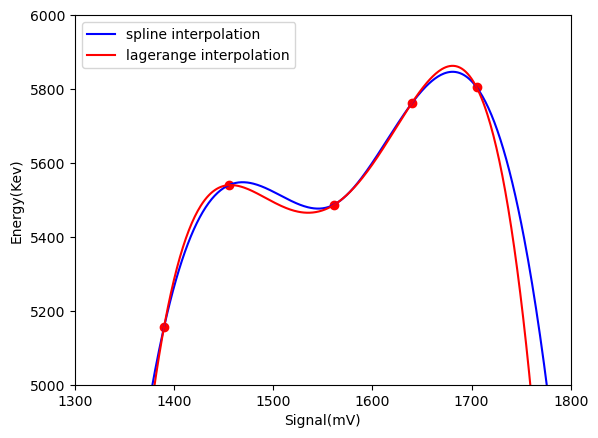

In [10]:
# 演示通过 scipy 中的内置函数 splrep 和 splev 计算三次样条插值拟合
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev

energy_alpha_source = np.zeros(5, dtype=float)
signal_alpha_source = np.zeros(5, dtype=float)

# 读入保存的数据
with open('Data/粒子物理能量幅度数据.dat','r') as fin:
    ii = 0
    for lines in fin:
        words = lines.split()
        energy_alpha_source[ii] = float(words[0])
        signal_alpha_source[ii] = float(words[1])
        ii += 1

# 进行三次样条插值
tck = splrep(signal_alpha_source, energy_alpha_source, k=3, s=1.2)
signal = np.arange(1300, 1800, 1)
energy_spl = splev(signal, tck)

# 作图
fig,ax = plt.subplots()
ax.plot(signal_alpha_source, energy_alpha_source, 'ro')
ax.plot(signal, energy_spl, 'b-', label='spline interpolation')
ax.plot(signal, energy, 'r-', label='lagerange interpolation')
ax.legend(loc='best')
ax.set_xlabel('Signal(mV)')
ax.set_ylabel('Energy(Kev)')
ax.set_xlim(1300, 1800)
ax.set_ylim(5000, 6000)